In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

In [2]:
df = pd.read_csv(r"C:\Users\patil\Downloads\student_dropout_new.csv")

In [3]:
df.head()

,student_id,age,gender,socioeconomic_status,parental_education_level,family_background,first_generation_student,gpa,previous_academic_performance,subject_failure_count,...,quiz_completion_rate,time_spent_on_learning_platform,login_frequency,engagement_score,learning_style,motivation_level,peer_interaction_score,counseling_sessions_attended,stress_level,dropout_status
0,S0001,21.0,Male,High,Primary,Nuclear,Yes,2.39,Medium,1.0,...,27,19.0,12,1,Visual,2,4,2,Medium,0
1,S0002,25.0,Female,NaN,Secondary,Joint,No,1.78,High,5.0,...,35,17.2,29,6,Kinesthetic,2,6,1,High,1
2,S0003,19.0,Male,Low,Primary,Guardian,No,3.88,Medium,1.0,...,27,NaN,2,10,Mixed,4,0,1,Medium,0
3,S0004,21.0,Female,Medium,NaN,Joint,Yes,2.44,Low,NaN,...,94,19.9,24,5,Visual,5,1,2,Low,0
4,S0005,20.0,NaN,Low,Graduate,Joint,Yes,3.08,Low,1.0,...,30,5.3,29,1,Auditory,1,9,0,Medium,1


In [4]:
df.describe()

,age,gpa,subject_failure_count,credits_completed,course_load,attendance_rate,class_participation_score,assignment_submission_rate,quiz_completion_rate,time_spent_on_learning_platform,login_frequency,engagement_score,motivation_level,peer_interaction_score,counseling_sessions_attended,dropout_status
count,4598.000000,4659.000000,4556.000000,5000.000000,5000.000000,4670.000000,5000.000000,5000.000000,5000.000000,4569.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,20.928012,2.742110,2.529192,70.093400,5.013200,69.697430,5.024600,64.989000,60.045200,10.589407,14.875400,5.536800,2.989000,4.979600,2.502400,0.243200
std,2.544328,0.729099,1.715374,29.124449,1.417119,17.195495,3.181323,20.730056,23.215145,5.449447,8.347371,2.878455,1.408572,3.185155,1.683972,0.429058
min,17.000000,1.500000,0.000000,20.000000,3.000000,40.000000,0.000000,30.000000,20.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,19.000000,2.100000,1.000000,45.000000,4.000000,55.000000,2.000000,47.000000,40.000000,6.000000,8.000000,3.000000,2.000000,2.000000,1.000000,0.000000
50%,21.000000,2.740000,3.000000,70.000000,5.000000,70.000000,5.000000,65.000000,60.000000,10.600000,15.000000,6.000000,3.000000,5.000000,3.000000,0.000000
75%,23.000000,3.370000,4.000000,95.000000,6.000000,85.000000,8.000000,83.000000,80.000000,15.300000,22.000000,8.000000,4.000000,8.000000,4.000000,0.000000
max,25.000000,4.000000,5.000000,119.000000,7.000000,99.000000,10.000000,100.000000,100.000000,20.000000,29.000000,10.000000,5.000000,10.000000,5.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   student_id                       5000 non-null   object 
 1   age                              4598 non-null   float64
 2   gender                           4441 non-null   object 
 3   socioeconomic_status             4530 non-null   object 
 4   parental_education_level         4481 non-null   object 
 5   family_background                5000 non-null   object 
 6   first_generation_student         5000 non-null   object 
 7   gpa                              4659 non-null   float64
 8   previous_academic_performance    5000 non-null   object 
 9   subject_failure_count            4556 non-null   float64
 10  credits_completed                5000 non-null   int64  
 11  course_load                      5000 non-null   int64  
 12  scholarship_status  

In [6]:
df.isnull().sum()

student_id                           0
age                                402
gender                             559
socioeconomic_status               470
parental_education_level           519
family_background                    0
first_generation_student             0
gpa                                341
previous_academic_performance        0
subject_failure_count              444
credits_completed                    0
course_load                          0
scholarship_status                   0
attendance_rate                    330
class_participation_score            0
assignment_submission_rate           0
quiz_completion_rate                 0
time_spent_on_learning_platform    431
login_frequency                      0
engagement_score                     0
learning_style                     392
motivation_level                     0
peer_interaction_score               0
counseling_sessions_attended         0
stress_level                         0
dropout_status           

In [7]:
df["gpa"].unique()

array([2.39, 1.78, 3.88, 2.44, 3.08,  nan, 1.85, 3.23, 2.21, 2.79, 1.52,
       2.77, 2.87, 2.8 , 2.66, 2.49, 2.48, 3.29, 2.63, 3.15, 1.76, 3.1 ,
       2.4 , 2.6 , 2.28, 1.6 , 3.37, 1.98, 3.66, 2.24, 2.84, 1.82, 3.31,
       1.73, 3.57, 2.88, 2.59, 2.55, 2.89, 3.6 , 2.57, 3.35, 3.43, 2.7 ,
       1.54, 1.72, 3.34, 3.05, 2.86, 1.59, 2.93, 2.98, 1.83, 1.68, 2.46,
       3.59, 3.96, 3.58, 3.54, 2.05, 2.53, 1.95, 2.13, 2.23, 2.19, 3.7 ,
       3.53, 1.67, 1.62, 2.78, 3.44, 1.93, 4.  , 3.42, 3.45, 2.52, 2.38,
       3.28, 2.36, 1.61, 1.51, 2.82, 2.76, 3.39, 2.16, 2.47, 3.77, 3.56,
       2.95, 2.02, 2.51, 2.14, 3.24, 3.49, 2.73, 3.84, 2.18, 1.55, 1.69,
       3.26, 3.94, 1.57, 2.37, 2.34, 2.  , 3.46, 3.65, 2.71, 3.36, 2.58,
       1.66, 2.54, 3.98, 2.31, 2.03, 1.96, 3.03, 3.79, 2.35, 3.92, 3.86,
       1.56, 3.06, 2.85, 1.53, 2.33, 3.21, 2.22, 2.9 , 1.81, 3.07, 3.97,
       3.81, 3.  , 2.56, 3.95, 3.11, 3.99, 2.96, 2.61, 1.92, 1.5 , 3.55,
       3.09, 2.72, 2.06, 2.64, 1.77, 3.89, 3.82, 3.

In [8]:
df["subject_failure_count"].unique()

array([ 1.,  5., nan,  3.,  4.,  0.,  2.])

In [9]:
df["attendance_rate"].unique()

array([94., 45., 76., 52., 43., 60., 83., 87., 40., 50., 48., 96., 93.,
       nan, 64., 58., 54., 71., 69., 44., 56., 63., 98., 72., 65., 57.,
       90., 99., 78., 91., 53., 41., 77., 47., 74., 46., 84., 62., 89.,
       85., 95., 97., 82., 92., 61., 70., 73., 79., 81., 66., 67., 55.,
       68., 86., 59., 88., 80., 75., 49., 42., 51.])

In [10]:
df["time_spent_on_learning_platform"].unique()

array([19. , 17.2,  nan, 19.9,  5.3,  9.9, 12.8,  4.1, 13.1,  3.2,  4.4,
        8.3,  9.5, 11.4,  2.6,  3.6, 17.6, 13.7, 14.8,  4.6,  1.4, 17.7,
        9.6, 11.7, 13.9, 15. ,  4.9, 19.8,  4.8,  9.8, 10. ,  7.6, 15.3,
       12.1, 13.2,  2.9,  6.7, 10.9,  8.6, 19.5,  5.1,  1.6, 12.6, 11. ,
        5.7, 16.5,  8.4, 17.3,  5. , 11.3, 16.2, 15.4,  8.1, 15.9,  2. ,
       17.1,  8.9,  4.7,  1. , 13.8, 11.8, 11.2,  5.4,  9.1,  6.4,  1.3,
       16.7,  6.8, 11.1,  4.3, 17.9, 10.5,  4.2, 16.3, 16. , 18.2,  3.5,
        4.5, 18.6, 14.3, 16.1,  8.5, 12. ,  3.9,  6.5, 17.5, 17.4, 17. ,
        8.7, 10.1,  2.2, 15.7,  5.9, 18.7,  9.4, 14.9,  9.7, 18.9, 19.6,
       19.3, 10.2,  8.2, 14.7, 19.7, 12.2, 18.8, 13.6,  2.4, 12.5, 10.4,
       13.4,  1.2, 11.6,  3.7, 15.6,  6. ,  1.8,  9.3, 15.8, 11.9, 18.4,
       16.9, 14.4, 19.1,  1.5, 14. ,  3.1, 10.3, 16.6,  7.2,  7. , 16.8,
        9. , 14.6, 13.3,  6.2,  7.3,  3.8,  8.8,  7.9, 10.6,  1.7,  7.5,
        5.6, 18.5, 18.1, 15.2, 19.2, 14.2,  7.1, 10

In [11]:
num_cols = df.select_dtypes(include=['int64','float64']).columns
for col in num_cols:
    df[col].fillna(df[col].mean(), inplace=True)

In [12]:
cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [13]:
df.isnull().sum()

student_id                         0
age                                0
gender                             0
socioeconomic_status               0
parental_education_level           0
family_background                  0
first_generation_student           0
gpa                                0
previous_academic_performance      0
subject_failure_count              0
credits_completed                  0
course_load                        0
scholarship_status                 0
attendance_rate                    0
class_participation_score          0
assignment_submission_rate         0
quiz_completion_rate               0
time_spent_on_learning_platform    0
login_frequency                    0
engagement_score                   0
learning_style                     0
motivation_level                   0
peer_interaction_score             0
counseling_sessions_attended       0
stress_level                       0
dropout_status                     0
dtype: int64

## Dropout Distribution

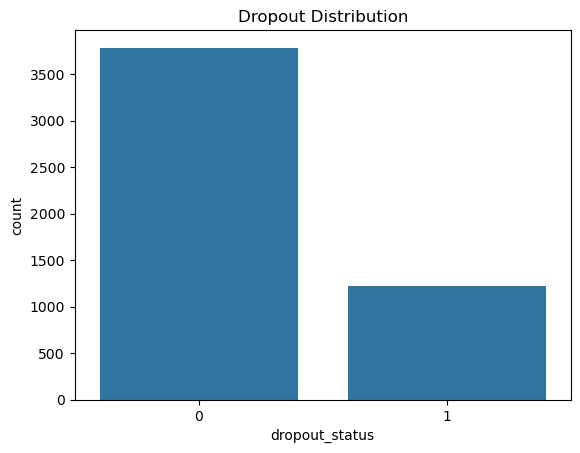

In [14]:
sns.countplot(data=df, x='dropout_status')
plt.title("Dropout Distribution")
plt.show()

## Dropout by Gender

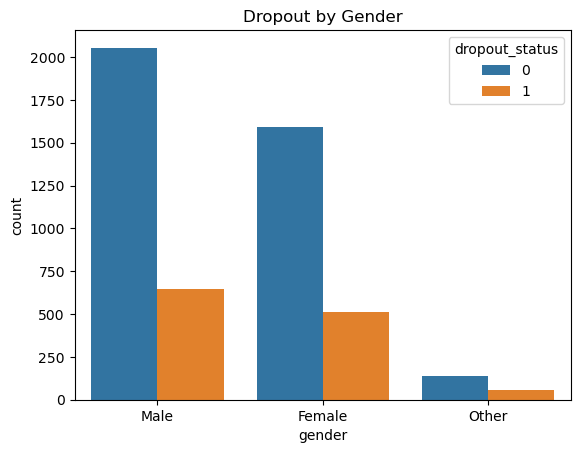

In [15]:
sns.countplot(data=df, x='gender', hue='dropout_status')
plt.title("Dropout by Gender")
plt.show()

## Age Distribution

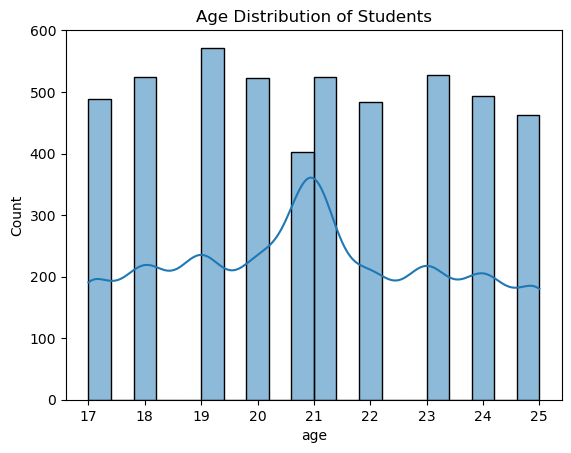

In [16]:
sns.histplot(df['age'], bins=20, kde=True)
plt.title("Age Distribution of Students")
plt.show()

## GPA by Dropout Status

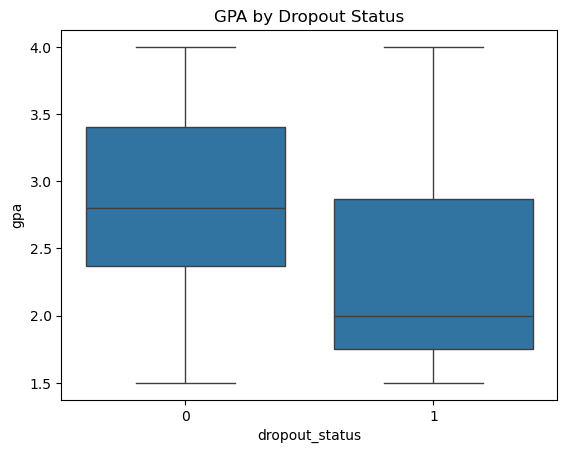

In [17]:
sns.boxplot(data=df, x='dropout_status', y='gpa')
plt.title("GPA by Dropout Status")
plt.show()

## Dropout by Scholarship Status

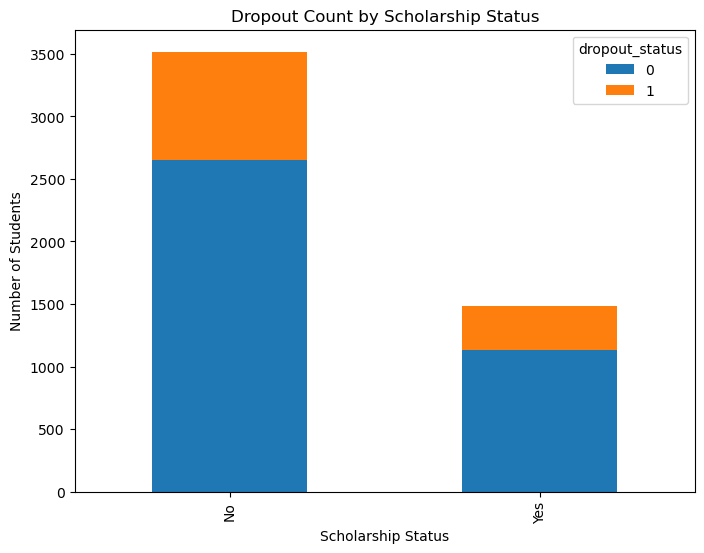

In [18]:
scholarship_dropout = pd.crosstab(df['scholarship_status'], df['dropout_status'])
scholarship_dropout.plot(kind='bar', stacked=True, figsize=(8,6))
plt.title("Dropout Count by Scholarship Status")
plt.ylabel("Number of Students")
plt.xlabel("Scholarship Status")
plt.show()

In [19]:
le = LabelEncoder()

cat_cols = df.select_dtypes(include=['object']).columns  
for col in cat_cols:
    df[col] = le.fit_transform(df[col].astype(str)) 

In [20]:
x = df.drop(['dropout_status','student_id'], axis=1)   
y = df['dropout_status']

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [22]:
DT = DecisionTreeClassifier(random_state=42)

In [23]:
DT.fit(x_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [24]:
y_predD = DT.predict(x_test)

In [25]:
acc = accuracy_score(y_test,y_predD)
acc * 100

97.39999999999999

In [26]:
cla = classification_report(y_test,y_predD)
print(cla)

              precision    recall  f1-score   support

           0       0.99      0.98      0.98       764
           1       0.93      0.96      0.95       236

    accuracy                           0.97      1000
   macro avg       0.96      0.97      0.96      1000
weighted avg       0.97      0.97      0.97      1000



In [27]:
cm = confusion_matrix(y_test,y_predD)
print(cm)

[[748  16]
 [ 10 226]]


In [28]:
RF = RandomForestClassifier(random_state=42)

In [29]:
RF.fit(x_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [30]:
y_predRF = RF.predict(x_test)

In [31]:
acc = accuracy_score(y_test,y_predRF)
acc * 100

98.7

In [32]:
cla = classification_report(y_test,y_predRF)
print(cla)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       764
           1       1.00      0.94      0.97       236

    accuracy                           0.99      1000
   macro avg       0.99      0.97      0.98      1000
weighted avg       0.99      0.99      0.99      1000



In [33]:
cm = confusion_matrix(y_test,y_predRF)
print(cm)

[[764   0]
 [ 13 223]]


In [34]:
XGB = XGBClassifier(random_state=42)

In [35]:
XGB.fit(x_train, y_train)

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [36]:
y_predXG = XGB.predict(x_test)

In [37]:
acc = accuracy_score(y_test,y_predXG)
acc * 100

98.4

In [38]:
cla = classification_report(y_test,y_predXG)
print(cla)

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       764
           1       0.98      0.95      0.97       236

    accuracy                           0.98      1000
   macro avg       0.98      0.97      0.98      1000
weighted avg       0.98      0.98      0.98      1000



In [39]:
models = {'Decision Tree': DT, 'Random Forest': RF, 'XGBoost': XGB}
results = {name: accuracy_score(y_test, model.predict(x_test)) for name, model in models.items()}
pd.DataFrame.from_dict(results, orient='index', columns=['Accuracy'])

,Accuracy
Decision Tree,0.974
Random Forest,0.987
XGBoost,0.984


In [40]:

# Dummy models for testing
class DummyModel:
    def predict(self, X):
        return [1 if X["GPA"].iloc[0] < 2.5 else 0]
    def predict_proba(self, X):
        p = 1 - (X["GPA"].iloc[0] / 4)
        return [[1-p, p]]

DT = DummyModel()
RF = DummyModel()

def predict_dropout(model_choice, gender, age, gpa, attendance):
    
    model = RF if model_choice == "Random Forest" else DT

    
    gender_num = 1 if gender == "Male" else 0

    
    data = pd.DataFrame([[gender_num, age, gpa, attendance]],
                        columns=['Gender', 'Age', 'GPA', 'Attendance'])

    
    pred = model.predict(data)[0]
    proba = model.predict_proba(data)[0][1]

    return f"{'Yes Dropout' if pred == 1 else 'No Dropout'} | Probability: {proba*100:.2f}%"

inputs = [
    gr.Dropdown(["Random Forest", "Decision Tree"], label="Model Name"),
    gr.Dropdown(["Male", "Female"], label="Gender"),
    gr.Number(label="Age"),
    gr.Number(label="GPA"),
    gr.Number(label="Attendance (%)")
]

output = gr.Textbox(label="Prediction Result")

gr.Interface(fn=predict_dropout, inputs=inputs, outputs=output, title="Student Dropout Prediction").launch()


* Running on local URL:  http://127.0.0.1:7862
* To create a public link, set `share=True` in `launch()`.
